<Axes: xlabel='structural_heterogeneity', ylabel='Density'>

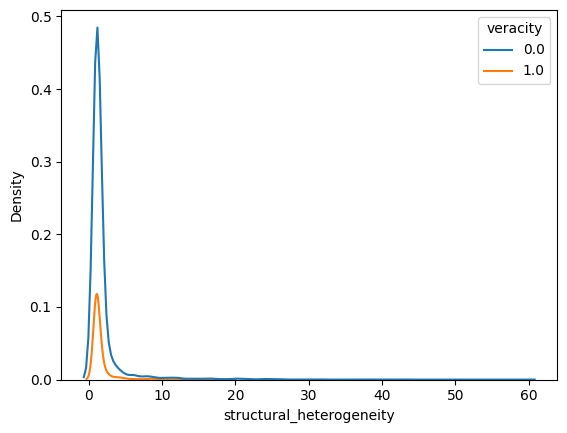

In [21]:
import seaborn as sns

sns.kdeplot(data=X_test, x="structural_heterogeneity", hue=y_test)

<Axes: xlabel='structural_heterogeneity', ylabel='Density'>

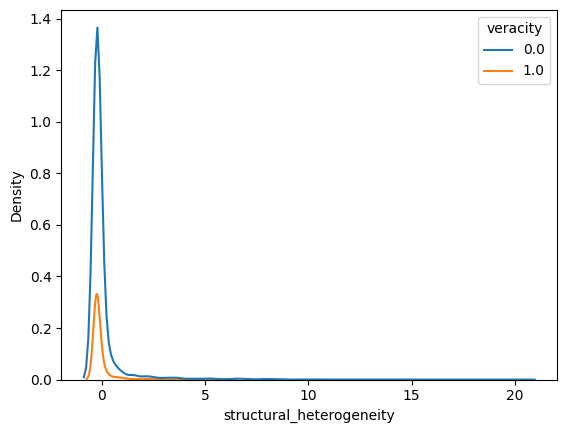

In [23]:
import seaborn as sns

sns.kdeplot(data=scaled_X_test, x="structural_heterogeneity", hue=y_test)

In [1]:
# # this piece of code will download the models from wandb 
# # for a particular project and then renames the folder accordingly
# # please avoid running this code all the time to avoid confusion

# import os
# import wandb

# os.environ["WANDB_API_KEY"] = "b21f4406f3966154b12e98de3bef934216952a54"
# os.environ["WANDB_ENTITY"] = "istiyaksiddiquee"

# wandb_project = "Appendix1"

# run = wandb.init(project=wandb_project)

# artifact = run.use_artifact(wandb_project + "/Logistic-Model:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/DT-Model:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/RF-Model:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/XGB-Model:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/LGB-Model:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/Default-RF-Cls:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/Stratified-Dummy-Cls:latest")
# model_dir = artifact.download()

# artifact = run.use_artifact(wandb_project + "/Most-Freq-Dummy-Cls:latest")
# model_dir = artifact.download()

# run.finish()

# os.rename('artifacts', wandb_project)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: istiyaksiddiquee. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


In [1]:
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    average_precision_score,
    fbeta_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix
)
from copy import copy


def get_all_scores(y_real, y_pred, y_scores):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average=None)
    recall = recall_score(y_real, y_pred, average=None)
    balanced_accuracy = balanced_accuracy_score(y_real, y_pred)
    fbeta = fbeta_score(y_real, y_pred, beta=0.5)
    avg_precision = average_precision_score(y_real, y_scores)
    roc_auc = roc_auc_score(y_real, y_scores)

    return {
        "average_precision": round(avg_precision, 2), 
        "precision_0": round(precision[0], 2), 
        "precision_1": round(precision[1], 2), 
        "recall_0": round(recall[0], 2), 
        "recall_1": round(recall[1], 2), 
        "roc_auc": round(roc_auc, 2),
        "balanced_accuracy": round(balanced_accuracy, 2),
        "fbeta": round(fbeta, 2), 
        "accuracy": round(accuracy, 2), 
    }

def test_model(model, scaled_X_test_df, y_test):
    y_pred = model.predict(scaled_X_test_df)
    y_pred_proba = model.predict_proba(scaled_X_test_df)
    
    return get_all_scores(y_test, y_pred, y_pred_proba[:, 1])

def get_confusion_matrix(model, scaled_X_test_df, y_test):
    y_pred = model.predict(scaled_X_test_df)
    return confusion_matrix(y_test, y_pred)
    
    # flipped_y = flip_true_false(y_pred)
    # print(get_all_scores(y_test, flipped_y, y_pred_proba[:, 0]))
    

In [2]:
# accuracy, precision, recall, balanced_accuracy, fbeta, avg_precision, roc_auc
import joblib
import pandas as pd

def performance_testing(project, scaled_X_test_df, y_test):

    logit_model = joblib.load(f'./{project}/Logistic-Model-v0/logit.joblib')
    logit_scores = test_model(logit_model, scaled_X_test_df, y_test)

    dt_model = joblib.load(f'./{project}/DT-Model-v0/dt.joblib')
    dt_scores = test_model(dt_model, scaled_X_test_df, y_test)

    rf_model = joblib.load(f'./{project}/RF-Model-v0/rf.joblib')
    rf_scores = test_model(rf_model, scaled_X_test_df, y_test)

    xgb_model = joblib.load(f'./{project}/XGB-Model-v0/xgb.joblib')
    xgb_scores = test_model(xgb_model, scaled_X_test_df, y_test)

    lgb_model = joblib.load(f'./{project}/LGB-Model-v0/lgb.joblib')
    lgb_scores = test_model(lgb_model, scaled_X_test_df, y_test)
    
    default_rf_model = joblib.load(f'./{project}/Default-RF-Cls-v0/default_rf.joblib')
    default_rf_scores = test_model(default_rf_model, scaled_X_test_df, y_test)

    freq_dummy_model = joblib.load(f'./{project}/Most-Freq-Dummy-Cls-v0/most_freq_dummy_cls.joblib')
    freq_dummy_scores = test_model(freq_dummy_model, scaled_X_test_df, y_test)

    stratified_dummy_model = joblib.load(f'./{project}/Stratified-Dummy-Cls-v0/stratified_dummy_cls.joblib')
    stratified_dummy_scores = test_model(stratified_dummy_model, scaled_X_test_df, y_test)

    # result_df = pd.DataFrame(
    #     [
    #     logit_scores, dt_scores, rf_scores, xgb_scores, lgb_scores, default_rf_scores, stratified_dummy_scores, freq_dummy_scores
    #     ],
    #     index=['logit_scores', 'dt_scores', 'rf_scores', 'xgb_scores', 'lgb_scores', 'default_rf_scores', 'stratified_dummy_scores', 'freq_dummy_scores']
    # )
    
    result_df = pd.DataFrame(
        [
        logit_scores, dt_scores, rf_scores, xgb_scores, lgb_scores, stratified_dummy_scores, freq_dummy_scores        ],
        index=['logit_scores', 'dt_scores', 'rf_scores', 'xgb_scores', 'lgb_scores', 'stratified_dummy_scores', 'freq_dummy_scores']
    )

    # return result_df.sort_values(by='average_precision', ascending=False)
    return result_df

In [3]:
def best_performing_model(project, result_df):
    model = None
    
    res = result_df.sort_values(by='average_precision', ascending=False)
    names = ['logit_scores', 'dt_scores', 'rf_scores', 'lgb_scores', 'xgb_scores', 'default_rf_scores', 'freq_dummy_scores', 'stratified_dummy_scores']
    if res.iloc[0].name == 'logit_scores':
        model = joblib.load(f'./{project}/Logistic-Model-v0/logit.joblib')
        # model = joblib.load(f'./{project}/LGB-Model-v0/lgb.joblib')
    elif res.iloc[0].name == 'dt_scores':
        model = joblib.load(f'./{project}/DT-Model-v0/dt.joblib')
    elif res.iloc[0].name == 'rf_scores':
        model = joblib.load(f'./{project}/RF-Model-v0/rf.joblib')
    elif res.iloc[0].name == 'lgb_scores':
        model = joblib.load(f'./{project}/LGB-Model-v0/lgb.joblib')
    elif res.iloc[0].name == 'xgb_scores':
        model = joblib.load(f'./{project}/XGB-Model-v0/xgb.joblib')
    elif res.iloc[0].name == 'default_rf_scores':
        model = joblib.load(f'./{project}/Default-RF-Cls-v0/default_rf.joblib')
    elif res.iloc[0].name == 'freq_dummy_scores':
        model = joblib.load(f'./{project}/Most-Freq-Dummy-Cls-v0/most_freq_dummy_cls.joblib')
    elif res.iloc[0].name == 'stratified_dummy_scores':
        model = joblib.load(f'./{project}/Stratified-Dummy-Cls-v0/stratified_dummy_cls.joblib')
    
    freq_model = joblib.load(f'./{project}/Most-Freq-Dummy-Cls-v0/most_freq_dummy_cls.joblib')
    strat_model = joblib.load(f'./{project}/Stratified-Dummy-Cls-v0/stratified_dummy_cls.joblib')
    return model, freq_model, strat_model

# logit_predict_proba = logit_model.predict_proba(scaled_X_test_df)

In [4]:
from copy import copy
import pickle
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

def read_pickled_data(dataset, feature_selection, quant, dropped_columns, normalization_columns):

    prefix = f'../../datasets-for-exp/{dataset}/{dataset}_'
    order = ['depth', 'size', 'max_breadth', 'virality', 'density', 'layer_ratio',  'structural_heterogeneity',  'characteristic_distance']

    with open(prefix + 'x_train_val.pickle', "rb") as file:
        X_train_val = pickle.load(file)

    with open(prefix + 'y_train_val.pickle' , "rb") as file:
        y_train_val = pickle.load(file)

    with open(prefix + 'x_test.pickle',  "rb") as file:
        X_test = pickle.load(file)

    with open(prefix + 'y_test.pickle',  "rb") as file:
        y_test = pickle.load(file)

    class CustomFunctionTransformer(FunctionTransformer):
        def get_feature_names_out(self, input_features=None):
            return input_features

    log_norm_custom = CustomFunctionTransformer(func=np.log)
    
    if feature_selection == 1:
        order = [item for item in order if item not in dropped_columns]
        normalization_columns = [item for item in normalization_columns if item not in dropped_columns]
        X_train_val.drop(dropped_columns, axis=1, inplace=True)
        X_test.drop(dropped_columns, axis=1, inplace=True)
    
    normalized_df = copy(X_train_val)
    
    scaler = StandardScaler()

    preprocessor = ColumnTransformer([
        ('log_norm', log_norm_custom, normalization_columns),  # Columns to log-normalize
        ('scale', scaler, list(set(list(X_train_val.columns)) - set(normalization_columns)))  # Columns to scale
    ], verbose_feature_names_out=False)

    if quant == True:
        cd_first_quantile = np.quantile(normalized_df["characteristic_distance"], 0.25)
        cd_third_quantile = np.quantile(normalized_df["characteristic_distance"], 0.75)
        normalized_df["characteristic_distance"] = normalized_df["characteristic_distance"] + cd_first_quantile**2 / cd_third_quantile
        
        test_cd_first_quantile = np.quantile(X_test["characteristic_distance"], 0.25)
        test_cd_third_quantile = np.quantile(X_test["characteristic_distance"], 0.75)
        X_test["characteristic_distance"] = X_test["characteristic_distance"] + test_cd_first_quantile**2 / test_cd_third_quantile
        
    scaled_X_train_val = preprocessor.fit_transform(normalized_df)
    scaled_X_test = preprocessor.transform(X_test)

    transformed_columns = list(preprocessor.get_feature_names_out())
    
    # transformed_columns[transformed_columns.index('scale__characteristic_distance')] = 'log_norm__characteristic_distance'
    # original_column_order[original_column_order.index('scale__characteristic_distance')] = 'log_norm__characteristic_distance'
    
    scaled_X_train_val_df = pd.DataFrame(scaled_X_train_val, columns=transformed_columns)
    scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=transformed_columns)
    
    scaled_X_train_val_df =  scaled_X_train_val_df[order]
    scaled_X_test_df =  scaled_X_test_df[order]

    return scaled_X_train_val_df, y_train_val, scaled_X_test_df, y_test


In [5]:
configuration = {
    'RQ2Final1_drop': ['max_breadth'],
    'RQ2Final2_drop': ['max_breadth', 'virality'],
    'RQ3Final1_drop': ['size', 'max_breadth'],
    'RQ3Final2_drop': ['max_breadth'],
    'RQ3Final3_drop': ['size', 'max_breadth', 'virality'],
    'RQ3Final4_drop': ['max_breadth'],
    'RQ4Final1_drop': ['virality'],
    
    'RQ2Final1_norm': ['size', 'max_breadth', 'characteristic_distance'],
    'RQ2Final2_norm': ['size', 'max_breadth', 'characteristic_distance'],
    'RQ3Final1_norm': ['size', 'max_breadth', 'characteristic_distance'],
    'RQ3Final2_norm': ['size', 'max_breadth'],
    'RQ3Final3_norm': ['size', 'max_breadth', 'characteristic_distance'],
    'RQ3Final4_norm': ['size', 'max_breadth', 'characteristic_distance'],
    'RQ4Final1_norm': ['size', 'max_breadth', 'virality', 'layer_ratio', 'structural_heterogeneity', 'characteristic_distance'],
    
    'RQ2Final1_quant': True,
    'RQ2Final2_quant': True,
    'RQ3Final1_quant': True,
    'RQ3Final2_quant': False,
    'RQ3Final3_quant': False,
    'RQ3Final4_quant': True,
    'RQ4Final1_quant': True,
}

In [26]:
# for cross testing

folder="RQ3Final4"
quant = True
feature_selection = 1
dropped_columns = ['max_breadth']
# normalization_columns = ['size', 'max_breadth']
normalization_columns = ['size', 'max_breadth', 'characteristic_distance']

scaled_X_train_val, y_train_val, scaled_X_test, y_test = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)
print(scaled_X_train_val.shape, y_train_val.shape, scaled_X_test.shape, y_test.shape)
result_df = performance_testing("RQ3Final2", scaled_X_test, y_test)
best_model = best_performing_model(folder, result_df)
# result_df.sort_values(by='average_precision', ascending=False, inplace=True)
result_df[['average_precision', 'precision_0', 'recall_0', 'precision_1', 'recall_1']]

# arr = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)

(221, 7) (221,) (25, 7) (25,)


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,average_precision,precision_0,recall_0,precision_1,recall_1
logit_scores,0.30,0.82,0.45,0.21,0.6
dt_scores,0.23,0.80,1.00,0.00,0.0
rf_scores,0.36,0.81,0.85,0.25,0.2
xgb_scores,0.29,0.92,0.55,0.31,0.8
lgb_scores,0.43,0.81,0.65,0.22,0.4
stratified_dummy_scores,0.33,0.70,0.35,0.13,0.4
freq_dummy_scores,0.20,0.80,1.00,0.00,0.0


In [6]:
folder="RQ3Final2"
quant = configuration[f'{folder}_quant']
feature_selection = 1
dropped_columns = configuration[f'{folder}_drop']
normalization_columns = configuration[f'{folder}_norm']

scaled_X_train_val, y_train_val, scaled_X_test, y_test = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)
print(scaled_X_train_val.shape, y_train_val.shape, scaled_X_test.shape, y_test.shape)
result_df = performance_testing(folder, scaled_X_test, y_test)
best_model, freq_model, strat_model = best_performing_model(folder, result_df)
# result_df.sort_values(by='average_precision', ascending=False, inplace=True)
result_df[['average_precision', 'precision_0', 'recall_0', 'precision_1', 'recall_1']]

(627, 7) (627,) (70, 7) (70,)


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len

,average_precision,precision_0,recall_0,precision_1,recall_1
logit_scores,0.29,1.00,0.74,0.19,1.00
dt_scores,0.17,0.95,0.95,0.25,0.25
rf_scores,0.40,0.96,0.98,0.50,0.25
xgb_scores,0.08,0.95,0.92,0.17,0.25
lgb_scores,0.30,0.96,0.97,0.33,0.25
stratified_dummy_scores,0.07,0.94,0.52,0.06,0.50
freq_dummy_scores,0.06,0.94,1.00,0.00,0.00


In [12]:
temp_df = scaled_X_train_val.join(y_train_val)
# temp_df.groupby(['veracity']).count()

In [37]:
# y_train_val.unique()
y_train_val = list(y_train_val)
len(y_train_val), len(list(y_test))

(627, 70)

In [35]:

verus = [i for i in range(0, len(y_train_val)) if y_train_val[i] == 1]
falsus = [i for i in range(0, len(y_train_val)) if y_train_val[i] != 1]
print(len(verus), len(falsus))

39 588


In [24]:
y_train_val.unique()

verus = [i for i in range(len(y_test)) if y_test.iloc[i] == 1]
falsus = [i for i in range(len(y_test)) if y_test.iloc[i] != 1]
print(len(verus), len(falsus))

4 66


In [ ]:
best_model

,depth,size,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
0,-0.863451,8.156510,-0.663419,-0.750586,-0.509913,0.643874,-0.759804
1,-1.172284,6.749931,-0.063452,1.744450,-0.881647,-0.405509,0.477831
2,-0.863451,7.706613,-0.538131,-0.290634,-0.712169,0.284488,0.639749
3,-0.245785,7.025538,0.332215,0.948410,0.024560,-0.715063,-0.759804
4,0.063047,7.896925,-0.423005,-0.510638,-0.509479,0.189365,-0.759804


In [62]:
from scipy.stats import mannwhitneyu

rq2final2 = [0.21, 0.24, 0.19, 0.22, 0.22, 0.22, 0.22]
rq3final3 = [0.29, 0.22, 0.22, 0.22, 0.26, 0.23, 0.22]
rq3final4 = [0.28, 0.26, 0.26, 0.21, 0.29, 0.2, 0.2]
rq4final1 = [0.28, 0.26, 0.26, 0.21, 0.29, 0.33, 0.20]

print(mannwhitneyu(rq2final2, rq4final1, alternative="two-sided", method="auto"))
print(mannwhitneyu(rq3final3, rq4final1, alternative="two-sided", method="auto"))
print(mannwhitneyu(rq3final4, rq4final1, alternative="two-sided", method="auto"))
# print(mannwhitneyu(rq2final2, rq4final1, alternative="two-sided", method="auto"))


MannwhitneyuResult(statistic=11.5, pvalue=0.10551629193054982)
MannwhitneyuResult(statistic=18.5, pvalue=0.4748298106546086)
MannwhitneyuResult(statistic=18.5, pvalue=0.47382309515134213)


In [2]:
from scipy.stats import mannwhitneyu

rq2final2 = [0.21, 0.24, 0.19, 0.22, 0.22, 0.22, 0.22]
rq3final3 = [0.29, 0.22, 0.22, 0.22, 0.26, 0.21, 0.22]
rq3final4 = [0.28, 0.26, 0.23, 0.23, 0.23, 0.26, 0.20]

print(mannwhitneyu(rq2final2, rq3final3, alternative="two-sided", method="auto"))
print(mannwhitneyu(rq2final2, rq3final4, alternative="two-sided", method="auto"))
print(mannwhitneyu(rq3final3, rq3final4, alternative="two-sided", method="auto"))

MannwhitneyuResult(statistic=17.5, pvalue=0.35704431950992677)
MannwhitneyuResult(statistic=9.0, pvalue=0.05129235199322831)
MannwhitneyuResult(statistic=17.0, pvalue=0.3614203298888473)


In [9]:
scaled_X_train_val.shape, scaled_X_test.shape, y_train_val[y_train_val==1].shape, y_test[y_test == 1].shape

((1270, 7), (142, 7), (276,), (31,))

In [7]:
best_model

LogisticRegression(C=5, fit_intercept=False, max_iter=500, n_jobs=-1,
                   solver='sag')

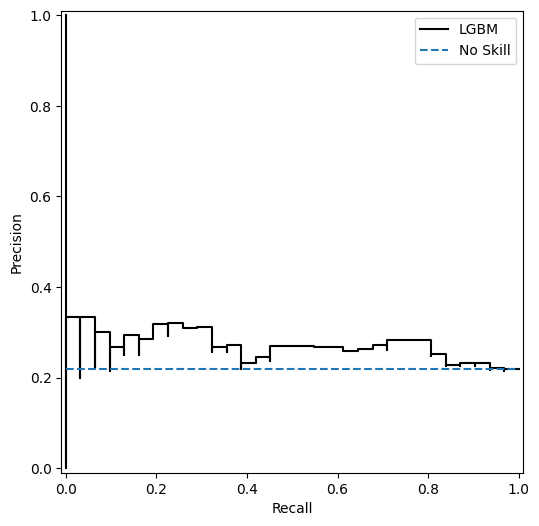

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

label = 1

# best_model, freq_model, strat_model 

best_predict_proba = best_model.predict_proba(scaled_X_test)
freq_dummy_predict_proba = freq_model.predict_proba(scaled_X_test)
strat_predict_proba = strat_model.predict_proba(scaled_X_test)

best_precision, best_recall, _ = precision_recall_curve(y_test, best_predict_proba[:, label])
most_freq_precision, most_freq_recall, _ = precision_recall_curve(y_test, freq_dummy_predict_proba[:, label])
stratified_precision, stratified_recall, _ = precision_recall_curve(y_test, strat_predict_proba[:, label])

no_skill = len(y_test[y_test==label]) / len(y_test)

colors = ['black', 'red', 'lime', 'dodgerblue', 'yellow', 'navy', 'cyan']

# Plot each model's Precision-Recall curve on the same axes
plt.figure(figsize=(8, 6))
lgb_display = PrecisionRecallDisplay(precision=best_precision, recall=best_recall)
lgb_display.plot(label="LGBM", color=colors[0], ax=plt.gca())  # plt.gca() gets current axes

# freq_display = PrecisionRecallDisplay(precision=most_freq_precision, recall=most_freq_recall)
# freq_display.plot(label="Most Frequent", color=colors[1], ax=plt.gca())  # plt.gca() gets current axes

# stratified_display = PrecisionRecallDisplay(precision=stratified_precision, recall=stratified_recall)
# stratified_display.plot(label="Stratified", color=colors[6], ax=plt.gca())  # plt.gca() gets current axes

plt.gca().plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Add labels and legend
# plt.title("Comparison of Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
# plt.show()

# plt.savefig(f'./{folder}/' + f'{folder}-pr-curve.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# for cross testing

folder="RQ3Final2"
quant = True
feature_selection = 1
dropped_columns = ['max_breadth']
# normalization_columns = ['size', 'max_breadth']
normalization_columns = ['size', 'max_breadth', 'characteristic_distance']

scaled_X_train_val, y_train_val, scaled_X_test, y_test = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)
print(scaled_X_train_val.shape, y_train_val.shape, scaled_X_test.shape, y_test.shape)
result_df = performance_testing("RQ3Final4", scaled_X_test, y_test)
best_model = best_performing_model(folder, result_df)
# result_df.sort_values(by='average_precision', ascending=False, inplace=True)
result_df[['average_precision', 'roc_auc', 'balanced_accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]

# arr = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)

(627, 7) (627,) (70, 7) (70,)


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,average_precision,roc_auc,balanced_accuracy,precision_0,precision_1,recall_0,recall_1
logit_scores,0.30,0.71,0.50,0.94,0.00,1.00,0.00
dt_scores,0.07,0.44,0.58,0.96,0.08,0.65,0.50
rf_scores,0.09,0.64,0.41,0.93,0.00,0.82,0.00
xgb_scores,0.07,0.59,0.59,0.96,0.09,0.68,0.50
lgb_scores,0.08,0.45,0.55,0.95,0.07,0.61,0.50
stratified_dummy_scores,0.06,0.49,0.59,0.97,0.08,0.44,0.75
freq_dummy_scores,0.06,0.50,0.50,0.94,0.00,1.00,0.00


In [72]:
import numpy as np

# Your PR-AUC scores
group1 = np.array([0.19, 0.16, 0.17, 0.16, 0.18, 0.16, 0.16])  # PR-AUC scores from Dataset A
group2 = np.array([0.3 , 0.17, 0.38, 0.06, 0.33, 0.06, 0.06])

from mlxtend.evaluate import permutation_test

p_value = permutation_test(group1, group2,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.6525347465253475


In [71]:
import numpy as np
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 23.5
P-value: 0.9481998574185876


In [104]:
dict = {}
for i in range(5, 9):
    feature_selection = 1
    if i%2 == 0:
        feature_selection = 0
    project = 'RQ2Comb'+str(i)
    print(f"project = {project}, feature_selection = {feature_selection}")
    scaled_X_train_val, y_train_val, scaled_X_test, y_test = read_pickled_data(dataset = "RQ2Final2", feature_selection = feature_selection)
    print(scaled_X_train_val.shape, y_train_val.shape, scaled_X_test.shape, y_test.shape)
    result_df = performance_testing(project = project, scaled_X_test_df=scaled_X_test, y_test=y_test)
    
    dict[project] = list(result_df['average_precision'].values)

project = RQ2Comb5, feature_selection = 1
(1270, 6) (1270,) (142, 6) (142,)
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_

In [102]:
feature_array = [
    'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1',
    'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 
    'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1',
    'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0',
]
smote_array = [
    'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 
    'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 
    'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 
    'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 
]

import numpy as np
result_array = []
for item in dict.keys():
    for k in dict[item]:
        result_array.append(k)

print(np.array(result_array).std(), np.array(result_array).var())

srh_df = pd.DataFrame({
    'feature_state': feature_array,
    'smote_state': smote_array,
    'result': result_array
})

print(result_array)

0.014603605928757766 0.00021326530612244895
[0.21, 0.24, 0.23, 0.22, 0.25, 0.22, 0.25, 0.22, 0.24, 0.23, 0.22, 0.26, 0.22, 0.22, 0.22, 0.22, 0.23, 0.21, 0.25, 0.22, 0.21, 0.2, 0.22, 0.24, 0.22, 0.25, 0.22, 0.22]


In [97]:
srh_df['rank'] = srh_df.result.sort_values().rank(numeric_only = float)

rows = srh_df.groupby(['feature_state'], as_index = False).agg({'rank':['count', 'mean', 'var']}).rename(columns={'rank':'row'})
rows.columns = ['_'.join(col) for col in rows.columns]
rows.columns = rows.columns.str.replace(r'_$',"")
rows['row_mean_rows'] = rows.row_mean.mean()
rows['sqdev'] = (rows.row_mean - rows.row_mean_rows)**2

cols = srh_df.groupby(['smote_state'], as_index = False).agg({'rank':['count', 'mean', 'var']}).rename(columns={'rank':'col'})
cols.columns = ['_'.join(col) for col in cols.columns]
cols.columns = cols.columns.str.replace(r'_$',"")
cols['col_mean_cols'] = cols.col_mean.mean()
cols['sqdev'] = (cols.col_mean-cols.col_mean_cols)**2

data_sum         = srh_df.groupby(['feature_state', 'smote_state'], as_index = False).agg({'rank':['count', 'mean', 'var']})
data_sum.columns = ['_'.join(col) for col in data_sum.columns]
data_sum.columns = data_sum.columns.str.replace(r'_$',"")

nobs_row   = rows.row_count.mean()
nobs_total = rows.row_count.sum()
nobs_col   = cols.col_count.mean()

Columns_SS = cols.sqdev.sum()*nobs_col
Rows_SS    = rows.sqdev.sum()*nobs_row
Within_SS  = data_sum.rank_var.sum()*(data_sum.rank_count.min()-1)
MS         = srh_df['rank'].var()
TOTAL_SS   = MS * (nobs_total-1)
Inter_SS   = TOTAL_SS - Within_SS - Rows_SS - Columns_SS

H_rows = Rows_SS/MS
H_cols = Columns_SS/MS
H_int  = Inter_SS/MS

df_rows   = len(rows)-1
df_cols   = len(cols)-1
df_int    = df_rows*df_cols
df_total  = len(srh_df)-1
df_within = df_total - df_int - df_cols - df_rows

from scipy import stats
p_rows  = round(1-stats.chi2.cdf(H_rows, df_rows),4)
p_cols  = round(1-stats.chi2.cdf(H_cols, df_cols),4)
p_inter = round(1-stats.chi2.cdf(H_int, df_int),4)

print(round(H_rows, 2), round(H_cols, 2), round(H_int, 2 ))
print(p_rows, p_cols, p_inter)

0.04 0.46 0.46
0.8459 0.4964 0.4964


In [18]:
folder="RQ2Final2"
quant = configuration[f'{folder}_quant']
feature_selection = 1
dropped_columns = configuration[f'{folder}_drop']
normalization_columns = configuration[f'{folder}_norm']

scaled_X_train_val, y_train_val, scaled_X_test, y_test = read_pickled_data(folder, feature_selection, quant, dropped_columns, normalization_columns)
print(scaled_X_train_val.shape, y_train_val.shape, scaled_X_test.shape, y_test.shape)
result_df = performance_testing(folder, scaled_X_test, y_test)
best_model, freq_model, strat_model = best_performing_model(folder, result_df)
# result_df.sort_values(by='average_precision', ascending=False, inplace=True)
result_df[['average_precision', 'precision_0', 'recall_0', 'precision_1', 'recall_1']]

(1270, 6) (1270,) (142, 6) (142,)


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,average_precision,precision_0,recall_0,precision_1,recall_1
logit_scores,0.22,0.78,0.23,0.22,0.77
dt_scores,0.24,0.78,0.98,0.00,0.00
rf_scores,0.19,0.78,0.96,0.20,0.03
xgb_scores,0.22,0.78,0.96,0.00,0.00
lgb_scores,0.25,0.77,0.93,0.11,0.03
stratified_dummy_scores,0.19,0.80,0.57,0.24,0.48
freq_dummy_scores,0.22,0.78,1.00,0.00,0.00


In [ ]:
# install.packages("rcompanion")
# install.packages("FSA")

# feature_array = c('Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1','Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature1', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0', 'Feature0')
# smote_array = c('SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1', 'SMOTE1',  'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0', 'SMOTE0')

# vosoughi
# result_array = c(0.18, 0.16, 0.17, 0.16, 0.18, 0.16, 0.16, 0.18, 0.17, 0.18, 0.16, 0.18, 0.16, 0.16, 0.18, 0.16, 0.18, 0.16, 0.18, 0.16, 0.16, 0.18, 0.16, 0.18, 0.16, 0.19, 0.16, 0.16)

# fibvid
# result_array = c(0.22, 0.24, 0.19, 0.22, 0.25, 0.22, 0.22, 0.22, 0.24, 0.23, 0.22, 0.26, 0.24, 0.22, 0.22, 0.22, 0.23, 0.21, 0.25, 0.22, 0.22, 0.2, 0.22, 0.24, 0.22, 0.25, 0.21, 0.22)

# Data = data.frame(feature_array, smote_array, result_array)

# library(rcompanion)

# scheirerRayHare(result_array ~ feature_array + smote_array, data = Data)

In [7]:
fibvid
rc = c(0.48, 0.55, 0.39, 0.48, 0.58, 0.55, 0.50, 0.48, 0.56, 0.49, 0.49, 0.51, 0.55, 0.50, 0.48, 0.50, 0.50, 0.48, 0.55, 0.51, 0.50, 0.45, 0.50, 0.55, 0.50, 0.52, 0.48, 0.50)
ba = c(0.50, 0.49, 0.50, 0.48, 0.48, 0.52, 0.50, 0.48, 0.49, 0.50, 0.49, 0.51, 0.55, 0.50, 0.50, 0.50, 0.50, 0.48, 0.55, 0.57, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.53, 0.50)

vosoughi
rc= c(0.53, 0.50, 0.54, 0.50, 0.56, 0.50, 0.50, 0.53, 0.52, 0.55, 0.50, 0.55, 0.50, 0.50, 0.53, 0.50, 0.55, 0.50, 0.55, 0.49, 0.50, 0.53, 0.50, 0.55, 0.50, 0.56, 0.50, 0.50)
ba = c(0.53, 0.50, 0.50, 0.50, 0.50, 0.51, 0.50, 0.53, 0.50, 0.50, 0.50, 0.50, 0.51, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.49, 0.50, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)

'RQ2Final2'

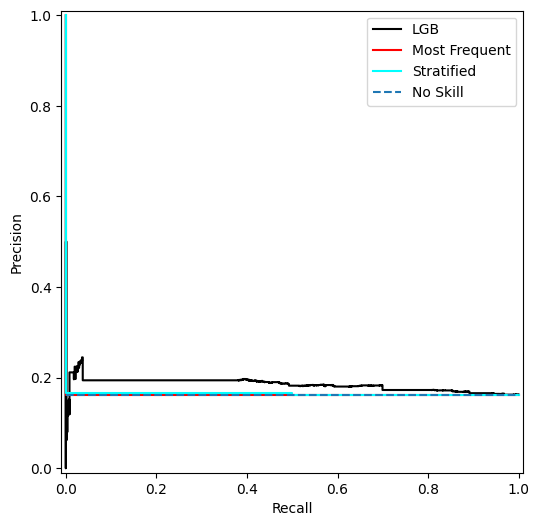

In [54]:
column_renaming_dict = {
    "scale__depth": "depth", 
    "log_norm__depth": "depth", 
    "scale__size": "size", 
    "log_norm__size": "size",
    "scale__max_breadth": "max_breadth", 
    'log_norm__max_breadth': 'max_breadth',
    'scale__virality': 'virality', 
    'log_norm__virality': 'virality',
    'scale__density': 'density', 
    'log_norm__density': 'density',
    'scale__layer_ratio': 'layer_ratio', 
    'log_norm__layer_ratio': 'layer_ratio',
    'scale__structural_heterogeneity': 'structural_heterogeneity',
    'log_norm__structural_heterogeneity': 'structural_heterogeneity',
    'scale__characteristic_distance': 'characteristic_distance',
    'log_norm__characteristic_distance': 'characteristic_distance'

}

renamed_columns = {}
for item in list(scaled_X_test.columns):
    renamed_columns[item] = column_renaming_dict[item]

scaled_X_test = scaled_X_test.rename(columns=renamed_columns)
# scaled_X_test

In [16]:
folder

'RQ2Final2'

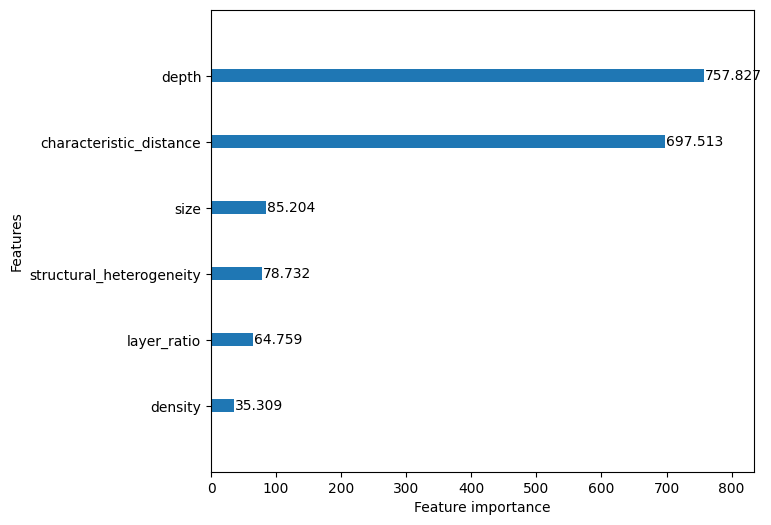

In [8]:
import lightgbm as lgb
import matplotlib.pyplot as plt


ax = lgb.plot_importance(best_model, importance_type="gain", figsize=(7,6), grid=False, title="")
# ax.set_yticklabels(ax.get_yticklabels(), rotation=30)  # Rotate labels by 45 
# plt.show()
plt.savefig(f'./{folder}/' + f'{folder}-lgb-feature-imp.pdf', format='pdf', bbox_inches='tight')

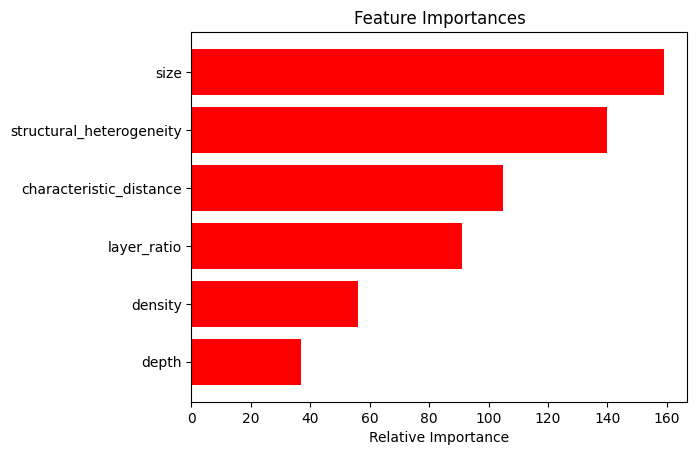

In [11]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
indices = np.argsort(best_model.feature_importances_)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [scaled_X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig(f'./{folder}/' + f'{folder}-feature-imp.pdf', format='pdf', bbox_inches='tight')

In [9]:
best_model

LogisticRegression(C=5, fit_intercept=False, max_iter=500, n_jobs=-1,
                   solver='sag')

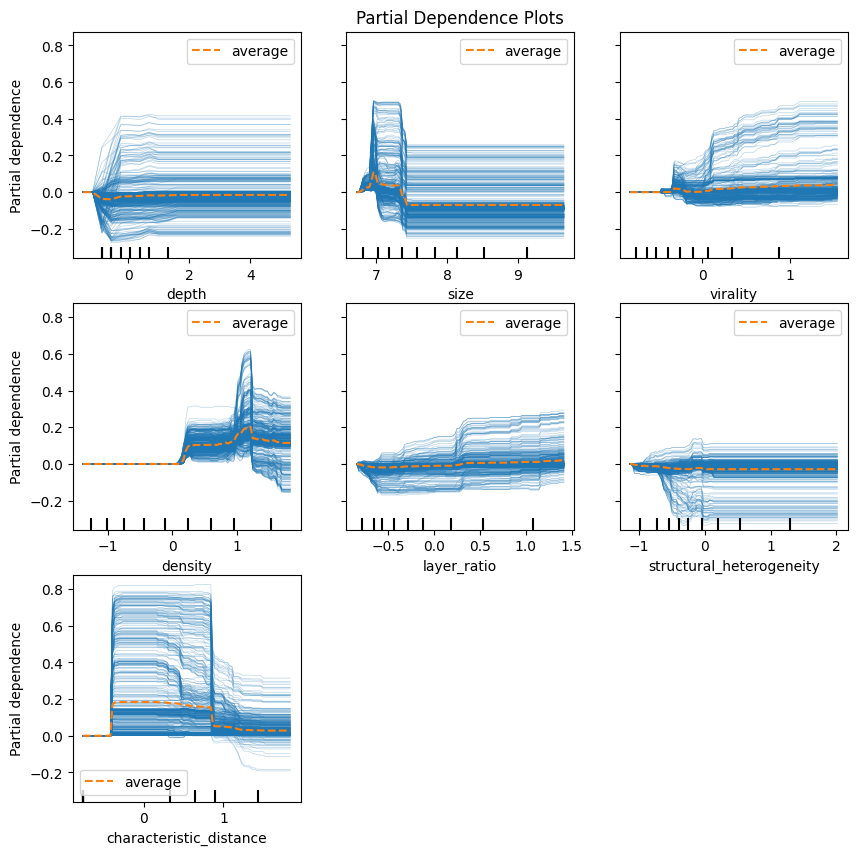

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=best_model,
    X=scaled_X_train_val,
    features=list(scaled_X_train_val.columns), # the features to plot
    random_state=5,
    ax=ax,
    kind="both",
    centered=True
)
# plt.show()
# plt.savefig(f'./{folder}/' + f'{folder}-pdp.pdf', format='pdf', bbox_inches='tight')

In [10]:
scaled_X_train_val.columns

Index(['depth', 'size', 'virality', 'density', 'layer_ratio',
       'structural_heterogeneity', 'characteristic_distance'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

features = ['depth', 'size', 'virality', 'density', 'layer_ratio', 'structural_heterogeneity', 'characteristic_distance']
# features = ['depth']

rows = 3
columns = 3

figure, axis = plt.subplots(rows, columns, figsize=(10, 8), dpi=100)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

x_axis = 0
y_axis = 0

for feature in features:
    partial_dep = partial_dependence(best_model, 
                                    scaled_X_train_val, 
                                    [feature], 
                                    kind='both', 
                                    grid_resolution=1000
                                )

    for i in range(0, scaled_X_train_val.shape[0]):
        partial_dep['individual'][0][i] -= partial_dep['individual'][0][i][0]
        
    axis[x_axis, y_axis].set_title(feature)
    axis[x_axis, y_axis].set_ylim(-1, 1)
    
    for i in range(0, scaled_X_train_val.shape[0]):
        axis[x_axis, y_axis].plot(
                partial_dep['grid_values'][0],
                partial_dep['individual'][0][i],
                linewidth=1,
                color='lightgrey' if y_train_val.iloc[i] == 0 else 'red',
                label='falsus' if y_train_val.iloc[i] == 0 else 'verus',
                alpha=0.5 if y_train_val.iloc[i] == 0 else 1)
        
    pdp = partial_dep['average'][0]-partial_dep['average'][0][0]
    axis[x_axis, y_axis].plot(partial_dep['grid_values'][0], pdp, linewidth=1.5, color='black',linestyle='--', label='average')
    
    y_axis += 1
    if y_axis >= columns:
        y_axis = 0
        x_axis += 1

for row in axis:
    for ax in row[1:]:  # Skip the first subplot in each row
        ax.yaxis.set_visible(False)

axis[2, 1].remove()
axis[2, 2].remove()

plt.legend(handles=[plt.Line2D([0], [0], color='lightgrey', label='falsus'),
                    plt.Line2D([0], [0], color='red', label='verus'),
                    plt.Line2D([0], [0], color='black',linestyle='--', label='average')
                    ], loc='upper left', bbox_to_anchor=(1.15, 1))

# plt.show()
# plt.savefig(f'./{folder}/' + f'{folder}-pdp-new.pdf', format='pdf', bbox_inches='tight')

: 

c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea

array([[<Axes: xlabel='depth', ylabel='ALE'>,
        <Axes: xlabel='size', ylabel='ALE'>,
        <Axes: xlabel='virality', ylabel='ALE'>],
       [<Axes: xlabel='density', ylabel='ALE'>,
        <Axes: xlabel='layer_ratio', ylabel='ALE'>,
        <Axes: xlabel='structural_heterogeneity', ylabel='ALE'>],
       [<Axes: xlabel='characteristic_distance', ylabel='ALE'>, None,
        None]], dtype=object)

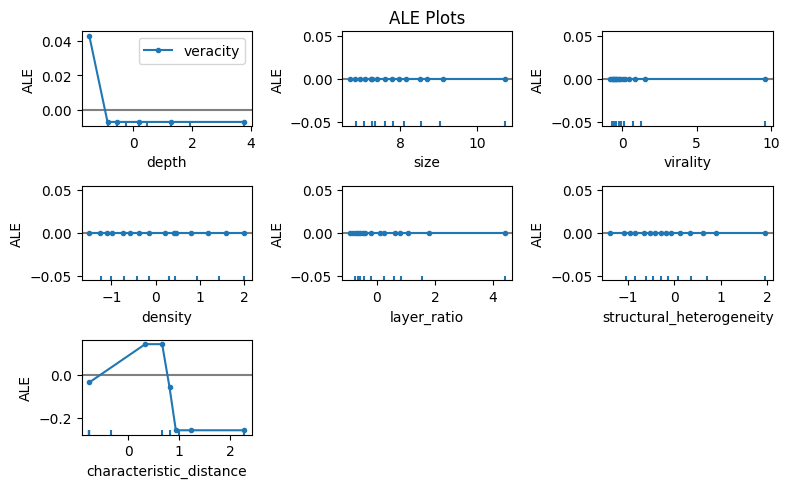

In [9]:
import matplotlib.pyplot as plt
from alibi.explainers import ALE, plot_ale

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("ALE Plots")

logit_fun_lr = best_model.predict
proba_fun_lr = best_model.predict_proba

logit_ale_lr = ALE(logit_fun_lr, feature_names=list(scaled_X_test.columns), target_names=['veracity'])
proba_ale_lr = ALE(proba_fun_lr, feature_names=list(scaled_X_test.columns), target_names=['veracity'])

logit_exp_lr = logit_ale_lr.explain(scaled_X_test.values)
proba_exp_lr = proba_ale_lr.explain(scaled_X_test.values)

plot_ale(logit_exp_lr, n_cols=3, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None, ax=ax, targets='all')

# plt.savefig(f'./{folder}/' + f'{folder}-ale.pdf', format='pdf', bbox_inches='tight')

RandomForestClassifier(criterion='entropy', max_depth=46,
                       min_impurity_decrease=0.005, n_estimators=150)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor  # Replace with your model
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

# Generate synthetic data (replace with your data)
np.random.seed(0)
X = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100)
})
y = X['feature_1'] + X['feature_2'] + np.random.normal(0, 0.1, 100)

# Fit a model
model = RandomForestRegressor().fit(X, y)

# Function to compute ICE derivative
def compute_ice_derivative(model, X, feature, grid_resolution=50):
    values = np.linspace(X[feature].min(), X[feature].max(), grid_resolution)
    ice_values = []
    
    for i in range(X.shape[0]):
        X_temp = X.copy()
        ice_values_instance = []
        
        # Compute ICE for individual instances over feature values
        for val in values:
            X_temp[feature] = val
            ice_values_instance.append(model.predict(X_temp.iloc[[i]])[0])
        
        # Compute derivative of ICE curve
        derivative = np.gradient(ice_values_instance, values)
        ice_values.append(derivative)
    
    return values, np.array(ice_values)

# Generate derivative ICE plot for a chosen feature
feature = 'depth'
values, ice_derivatives = compute_ice_derivative(best_model, scaled_X_train_val, feature, 1000)

# Plot derivative ICE
plt.figure(figsize=(10, 6))
for i in range(ice_derivatives.shape[0]):
    plt.plot(values, ice_derivatives[i], color="blue", alpha=0.2)
plt.xlabel(f'{feature}')
plt.ylabel('Derivative of ICE')
plt.title(f'Derivative ICE Plot for {feature}')
plt.show()


KeyboardInterrupt: 

C:\Users\siddiquee\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ExactExplainer explainer: 33580it [02:52, 189.81it/s]                           


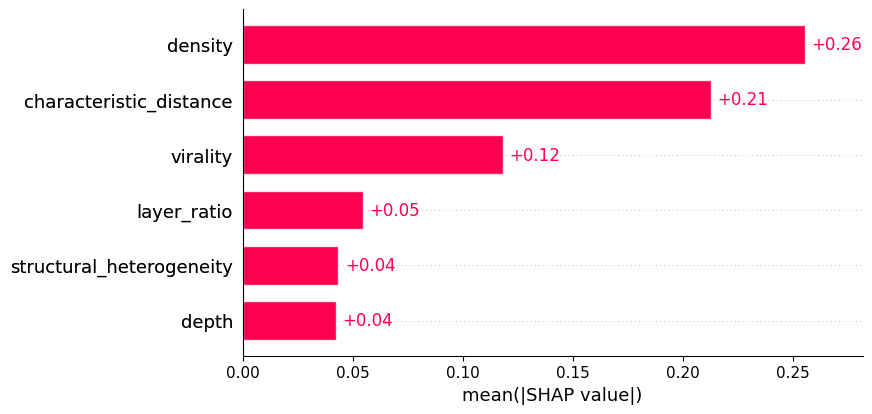

In [7]:
import shap
explainer = shap.Explainer(best_model.predict, scaled_X_train_val)
# Calculates the SHAP values - It takes some time
shap_values = explainer(scaled_X_train_val)
shap.plots.bar(shap_values)

In [9]:
folder

'RQ3Final1'

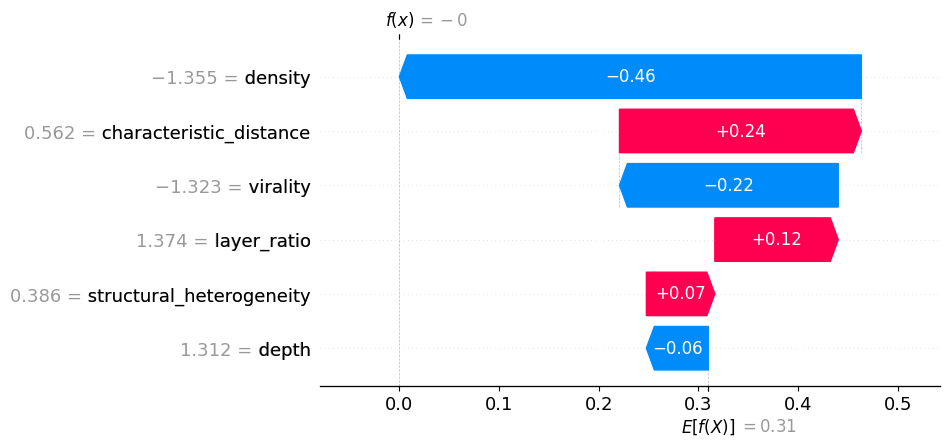

In [17]:
import matplotlib.pyplot as plt
shap.plots.waterfall(shap_values[2], show=True)


# plt.show()
# plt.savefig(f'./{folder}/' + f'{folder}-beeswarm.pdf', format='pdf', bbox_inches='tight')




In [11]:
scaled_X_test.iloc[[62]],  y_test.iloc[[62]]

(       depth  virality  density  layer_ratio  structural_heterogeneity  \
 62 -0.589341 -1.233771 -1.07354    -0.415872                  0.254239   
 
     characteristic_distance  
 62                 2.501156  ,
 71612    0.0
 Name: veracity, dtype: float64)

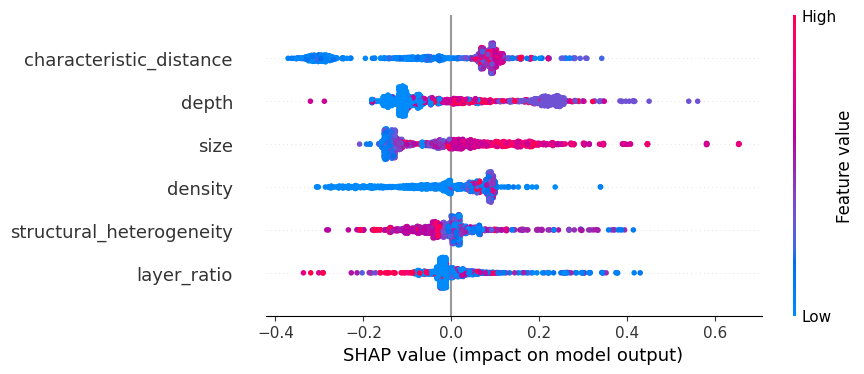

In [13]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values=shap_values, show=False)


# plt.show()
plt.savefig(f'./{folder}/' + f'{folder}-beeswarm.pdf', format='pdf', bbox_inches='tight')


In [77]:
list(best_model.predict(scaled_X_test.iloc[[62]]))[0] ,  list(y_test.iloc[[62]].values)[0]

(1.0, 0.0)

In [75]:
for i in range(0, scaled_X_test.shape[0]):
    if list(best_model.predict(scaled_X_test.iloc[[i]]))[0] != list(y_test.iloc[[i]].values)[0]:
        print(i)

17
34
56
62


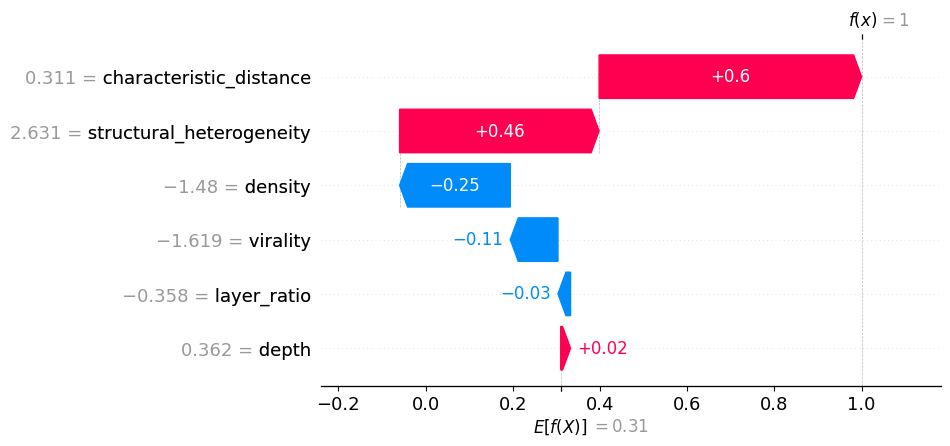

In [10]:
shap.plots.waterfall(shap_values[62])

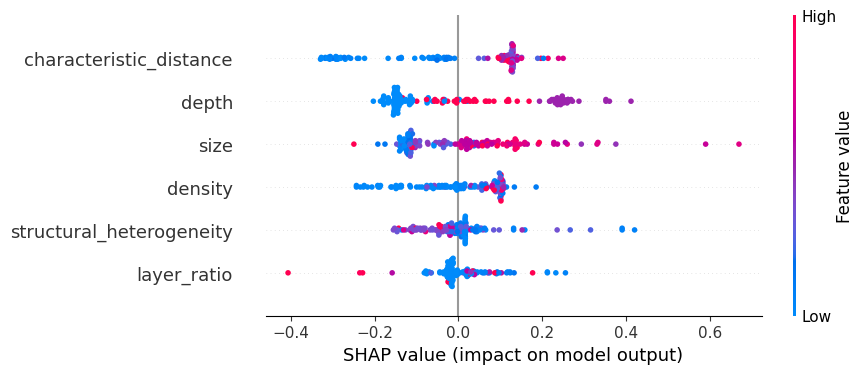

In [ ]:
import matplotlib.pyplot as plt

fig=plt.gcf()
shap.plots.beeswarm(shap_values=shap_values)

# plt.show()
# fig.savefig(f'./{folder}/' + f'{folder}-beeswarm.pdf', format='pdf', bbox_inches='tight')


In [86]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(scaled_X_train_val.values,
    feature_names=list(scaled_X_train_val.columns),
    mode='classification')

In [107]:
predict_fn_rf = lambda x: best_model.predict_proba(x).astype(float)
exp = lime_explainer.explain_instance(scaled_X_test.iloc[[62]].values[0], predict_fn_rf, num_features=7)
exp.show_in_notebook(show_all=False)

c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
import numpy as np
from scipy.stats import chi2

def rank_data_with_tie_handling(data):
    """
    Ranks data within each block (experiment) while handling ties.
    
    Parameters:
    - data (3D NumPy Array): Experiments × Algorithms × Configurations
    
    Returns:
    - ranked_data (3D NumPy Array): Ranked data with tie handling
    """
    ranked_data = np.zeros(data.shape)
    for exp_idx in range(data.shape[0]):  # Loop through each experiment
        exp_data = data[exp_idx, :, :].flatten()  # Flatten algorithms and configurations
        sorted_indices = np.argsort(-exp_data)  # Sort in descending order
        ranks = np.zeros_like(exp_data)
        
        # Handle ties by assigning the average of tied ranks
        current_rank = 1
        for idx in sorted_indices:
            if np.sum(exp_data[idx] == exp_data[sorted_indices[:sorted_indices.tolist().index(idx)]]) > 0:
                # If this is a tied value, find all tied values and assign average rank
                tied_mask = exp_data == exp_data[idx]
                num_ties = np.sum(tied_mask)
                tied_rank = (current_rank + (current_rank + num_ties - 1)) / 2
                ranks[tied_mask] = tied_rank
                current_rank += num_ties
            else:
                ranks[idx] = current_rank
                current_rank += 1
        
        ranked_data[exp_idx, :, :] = ranks.reshape(6, 2)  # Reshape back
    return ranked_data

def scheirer_ray_hare_test(ranked_data):
    """
    Performs the Scheirer–Ray–Hare test on the ranked data.
    
    Parameters:
    - ranked_data (3D NumPy Array): Ranked data with tie handling
    
    Returns:
    - H (float): Test Statistic
    - df (int): Degrees of Freedom
    - p_value (float): p-value of the test
    """
    # Calculate column sums (configuration sums across all experiments and algorithms)
    config_sums = np.sum(ranked_data, axis=(0, 1))
    
    # Grand sum (total of all ranks)
    grand_sum = np.sum(config_sums)
    
    # Calculate the test statistic (H)
    N = ranked_data.size // 2  # Total number of observations per configuration
    k = 2  # Number of configurations
    n_j = ranked_data.shape[0] * ranked_data.shape[1]  # Number of observations per cell
    H = (12 / (N * (N + 1))) * (np.sum(config_sums**2) / n_j) - 3 * (N + 1)
    
    # Degrees of Freedom
    df = k - 1
    
    # Approximate p-value using chi-square distribution
    p_value = chi2.sf(H, df)
    
    return H, df, p_value

# Example Data (update with your actual data)
np.random.seed(0)  # For reproducibility
data = np.random.rand(4, 6, 2)  # 4 Experiments, 6 Algorithms, 2 Configurations

ranked_data = rank_data_with_tie_handling(data)
H, df, p_value = scheirer_ray_hare_test(ranked_data)

print("Ranked Data (Example):")
print(ranked_data[:, 0, 0])  # Example print, first algorithm across experiments for one config
print("\nScheirer–Ray–Hare Test Results:")
print(f"Test Statistic (H): {H}, Degrees of Freedom: {df}, p-value: {p_value}")

Ranked Data (Example):
[ 7.  8. 11.  7.]

Scheirer–Ray–Hare Test Results:
Test Statistic (H): -33.83833333333333, Degrees of Freedom: 1, p-value: 1.0


In [ ]:
# old style models need this function

# from copy import copy
# import pickle
# import numpy as np
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, FunctionTransformer

# def read_pickled_data(dataset, feature_selection, quant, dropped_columns, normalization_columns):

#     original_column_order = []
#     prefix = f'../../datasets-for-exp/{dataset}/{dataset}_'
#     order = ['depth', 'size', 'max_breadth', 'virality', 'density', 'layer_ratio',  'structural_heterogeneity',  'characteristic_distance']

#     with open(prefix + 'x_train_val.pickle', "rb") as file:
#         X_train_val = pickle.load(file)

#     with open(prefix + 'y_train_val.pickle' , "rb") as file:
#         y_train_val = pickle.load(file)

#     with open(prefix + 'x_test.pickle',  "rb") as file:
#         X_test = pickle.load(file)

#     with open(prefix + 'y_test.pickle',  "rb") as file:
#         y_test = pickle.load(file)

#     class CustomFunctionTransformer(FunctionTransformer):
#         def get_feature_names_out(self, input_features=None):
#             return input_features

#     log_norm_custom = CustomFunctionTransformer(func=np.log)
    
#     if feature_selection == 1:
#         order = [item for item in order if item not in dropped_columns]
#         normalization_columns = [item for item in normalization_columns if item not in dropped_columns]
#         X_train_val.drop(dropped_columns, axis=1, inplace=True)
#         X_test.drop(dropped_columns, axis=1, inplace=True)
    
#     for item in order:
#         if item in normalization_columns:
#             original_column_order.append('log_norm__'+item)
#         else:
#             original_column_order.append('scale__'+item)

#     normalized_df = copy(X_train_val)
    
#     scaler = StandardScaler()

#     preprocessor = ColumnTransformer([
#         ('log_norm', log_norm_custom, normalization_columns),  # Columns to log-normalize
#         ('scale', scaler, list(set(list(X_train_val.columns)) - set(normalization_columns)))  # Columns to scale
#     ])

#     if quant == True:
#         cd_first_quantile = np.quantile(normalized_df["characteristic_distance"], 0.25)
#         cd_third_quantile = np.quantile(normalized_df["characteristic_distance"], 0.75)
#         normalized_df["characteristic_distance"] = normalized_df["characteristic_distance"] + cd_first_quantile**2 / cd_third_quantile
        
#         test_cd_first_quantile = np.quantile(X_test["characteristic_distance"], 0.25)
#         test_cd_third_quantile = np.quantile(X_test["characteristic_distance"], 0.75)
#         X_test["characteristic_distance"] = X_test["characteristic_distance"] + test_cd_third_quantile
        
#     scaled_X_train_val = preprocessor.fit_transform(normalized_df)
#     scaled_X_test = preprocessor.transform(X_test)

#     transformed_columns = preprocessor.get_feature_names_out()
    
#     scaled_X_train_val_df = pd.DataFrame(scaled_X_train_val, columns=transformed_columns)
#     scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=transformed_columns)

#     scaled_X_train_val_df =  scaled_X_train_val_df[original_column_order]
#     scaled_X_test_df =  scaled_X_test_df[original_column_order]

#     return scaled_X_train_val_df, y_train_val, scaled_X_test_df, y_test

In [54]:
import pickle 
import numpy as np 

prefix = f'../../datasets-for-exp/'

with open(prefix + f'RQ3Final1/RQ3Final1_x_train_val.pickle', "rb") as file:
    small_X_train_val = pickle.load(file)

with open(prefix + f'RQ3Final2/RQ3Final2_x_train_val.pickle', "rb") as file:
    big_X_train_val = pickle.load(file)

cd_first_quantile = np.quantile(small_X_train_val["characteristic_distance"], 0.25)
cd_third_quantile = np.quantile(small_X_train_val["characteristic_distance"], 0.75)
small_X_train_val["characteristic_distance"] = small_X_train_val["characteristic_distance"] + cd_first_quantile**2 / cd_third_quantile
small_X_train_val["characteristic_distance"] = np.log(small_X_train_val["characteristic_distance"])

cd_first_quantile = np.quantile(big_X_train_val["characteristic_distance"], 0.25)
cd_third_quantile = np.quantile(big_X_train_val["characteristic_distance"], 0.75)
big_X_train_val["characteristic_distance"] = big_X_train_val["characteristic_distance"] + cd_first_quantile**2 / cd_third_quantile
big_X_train_val["characteristic_distance"] = np.log(big_X_train_val["characteristic_distance"])

small_X_train_val.rename(columns={"characteristic_distance": "small_CD"}, inplace=True)
big_X_train_val.rename(columns={"characteristic_distance": "big_CD"}, inplace=True)


small_X_train_val = small_X_train_val['small_CD']
big_X_train_val = big_X_train_val['big_CD']

small_X_train_val.shape, big_X_train_val.shape


C:\Users\siddiquee\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((33579,), (627,))

In [55]:
from matplotlib.cbook import boxplot_stats
import numpy as np

# Example data: Replace these with your lists
small_X_train_val = {
    'small_CD': small_X_train_val.to_list(),
    'big_CD': big_X_train_val.to_list()
}

# Prepare a dictionary for the boxplot stats
boxplot_data = {}
for col, values in small_X_train_val.items():
    stats = boxplot_stats(np.array(values))[0]  # Compute boxplot stats
    boxplot_data[col] = {
        'Q1': round(stats['q1'], 2),
        'Q3': round(stats['q3'], 2),
        'WhisLo': round(stats['whislo'], 2),
        'WhisHi': round(stats['whishi'], 2),
        'IQR': round(stats['iqr'], 2),
        'Min': round(min(values), 2),
        'Max': round(max(values), 2),
        'Mean': round(np.mean(values), 2),
        'Median': round(np.median(values), 2),
        'Variance': round(np.var(values), 2),
        'StdDev': round(np.std(values), 2)
    }

# Convert the dictionary into a tabular-like structure for easy viewing
import pandas as pd
boxplot_summary = pd.DataFrame(boxplot_data).T  # Transpose to match expected format

# Display the summary
print(boxplot_summary)


            Q1    Q3  WhisLo  WhisHi   IQR   Min    Max  Mean  Median  \
small_CD  0.82  1.20    0.27    1.75  0.37 -0.17  23.31  1.04    0.82   
big_CD     NaN -0.42     NaN   -0.42   NaN  -inf   0.73  -inf    -inf   

          Variance  StdDev  
small_CD      0.24    0.49  
big_CD         NaN     NaN  


C:\Users\siddiquee\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\siddiquee\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [63]:
import matplotlib.pyplot as plt

# Use the boxplot_summary object created above
# Example content of boxplot_summary:
#            Q1    Q3  WhisLo  WhisHi   IQR  Min  Max  Mean  Median  Variance  StdDev
# feature1  2.5   5.5     1.0     7.0  3.0  1.0  7.0   4.0    4.0       4.0    2.0
# feature2  5.0  13.0     2.0    17.0  8.0  2.0 17.0   8.3    7.0      27.9    5.3
# feature3  9.5  12.5     8.0    14.0  3.0  8.0 14.0  11.0   11.0       4.0    2.0

# Extracting data for plotting
boxplot_data = []
positions = []
for idx, (feature, stats) in enumerate(boxplot_summary.iterrows()):
    box = {
        'q1': stats['Q1'],
        'q3': stats['Q3'],
        'whislo': stats['WhisLo'],
        'whishi': stats['WhisHi'],
        'med': stats['Median'],
        'fliers': []  # Assuming no fliers
    }
    boxplot_data.append(box)
    positions.append(idx + 1)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Use Matplotlib's bxp to plot boxplot data
ax.bxp(boxplot_data, positions=positions, widths=0.6)

# Customise the plot
ax.set_xticks(positions)
ax.set_xticklabels(boxplot_summary.index, rotation=45)

plt.ylabel("log values")
plt.xlabel("Characteristic Distance")

# Show plot
# plt.show()

plt.savefig('./box_plot_cd.pdf', format='pdf', bbox_inches='tight')